In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)
from datetime import date, timedelta
from scipy import stats
import scipy.optimize as sco
import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
symbol = pd.read_csv("nasdaq_stocks.csv")
symbol_dict = dict(zip(symbol["Name"], symbol["Symbol"]))
#stocks = ["Apple Inc.", "Amazon.com Inc.", "Alphabet Inc.", "Netflix Inc.", "Tesla Inc."]
stocks = random.sample(list(symbol_dict.keys()), 10)
stocks = [symbol_dict[i] for i in stocks]

In [3]:
stocks = ['ALRS', 'DKL', 'KRNT', 'MTH', 'MYD', 'POOL', 'RSG']
stocks

['ALRS', 'DKL', 'KRNT', 'MTH', 'MYD', 'POOL', 'RSG']

In [4]:
data = pdr.get_data_yahoo(stocks, start=date.today()-timedelta(365*6), end=date.today()-timedelta(365))["Adj Close"]

[*********************100%***********************]  7 of 7 completed


In [5]:
list(set(data.columns) - set(data.dropna(axis=1).columns))

[]

In [6]:
data = data.dropna(axis=1)

In [7]:
data

,ALRS,DKL,KRNT,MTH,MYD,POOL,RSG
Date,,,,,,,
2016-09-07,14.999015,15.885189,10.650000,36.730000,11.761924,93.372391,45.354683
2016-09-08,14.999015,15.320214,10.420000,36.369999,11.776618,92.233963,45.408276
2016-09-09,14.852814,15.089833,9.890000,34.720001,11.673762,89.364288,44.237999
2016-09-12,14.852814,15.457346,9.390000,35.410000,11.644375,90.004105,44.908001
2016-09-13,14.852814,15.479283,9.510000,34.250000,11.579431,88.498688,44.631069
...,...,...,...,...,...,...,...
2021-08-30,28.999748,39.221645,131.740005,112.260002,14.593676,487.242645,122.536530
2021-08-31,29.136354,39.979820,130.369995,111.540001,14.555598,490.088226,122.398476
2021-09-01,28.472836,39.526764,129.800003,113.930000,14.584155,487.044403,123.078850


In [8]:
from sklearn.decomposition import PCA

In [9]:
rs = data.apply(np.log).diff(1)
pca = PCA(1).fit(rs.fillna(0))
pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

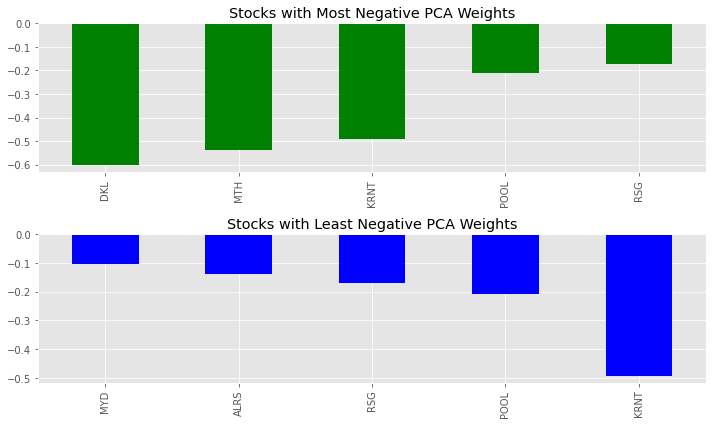

In [10]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest().plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest().plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()
plt.show()

In [11]:
pc1.nlargest()[pc1.nlargest()/pc1.nlargest().sum() * 100 <=50]

MYD    -0.105269
ALRS   -0.140294
RSG    -0.171736
POOL   -0.208932
KRNT   -0.492101
dtype: float64